In [3]:
#standard packages
import pandas as pd
import numpy as np
import re
from pprint import pprint

#webscraping packages & SQLite
import pymongo
from pymongo import MongoClient
from bs4 import BeautifulSoup, SoupStrainer
import requests
import urllib.request
import functions as mf

#nlp packages
import string
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_lg')

#EDA packages
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns


from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors 
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
client = MongoClient()
db = client.case_files
cases = db.cases

In [5]:
df = pd.DataFrame(list(cases.find()))

In [6]:
#import cleaning class
c_d = mf.clean_data

In [7]:
clean_data_df = c_d.clean_data(df)

In [29]:
combined_df = pd.read_csv('combined_df.csv')

In [8]:
clean_data_df.head()

,_id,attorneys,case_id,case_name,case_text,court_id,court_name,decision_date,frontend_url,judges,majority_opinion,other_opinions,tokenized_majority_opinion,no_stop_words_majority
0,5d66e470e59ddf33befdfe06,None,37588,In the matter of the Complaint made against Jo...,"[{'text': 'ORDER OF PUBLIC CENSURE Whereas, In...",8874,Kansas Supreme Court,1970,https://cite.case.law/kan/206/335/,None,order of public censure whereas in a proceedin...,[],"(order, of, public, censure, whereas, in, a, p...","[order, public, censure, proceeding, conducted..."
1,5d66e470e59ddf33befdfe07,None,37656,In the matter of the Complaint made against Ro...,"[{'text': 'ORDER OF PUBLIC CENSURE Whereas, In...",8874,Kansas Supreme Court,1970,https://cite.case.law/kan/206/334/,None,order of public censure whereas in a proceedin...,[],"(order, of, public, censure, whereas, in, a, p...","[order, public, censure, proceeding, conducted..."
2,5d66e470e59ddf33befdfe08,None,1747634,State of Connecticut v. Anonymous (1971-5),"[{'text': 'Moraghan, J. The defendant has move...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/443/,None,moraghan j the defendant has moved to suppress...,[],"(moraghan, j, the, defendant, has, moved, to, ...","[moraghan, j, defendant, moved, suppress, cert..."
3,5d66e470e59ddf33befdfe09,None,1747661,State of Connecticut v. Anonymous (1971-3),"[{'text': 'Dearington, J. Following a trial to...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/393/,None,dearington j following a trial to the jury the...,[],"(dearington, j, following, a, trial, to, the, ...","[dearington, j, following, trial, jury, defend..."
4,5d66e470e59ddf33befdfe0a,None,1747680,State of Connecticut v. Anonymous (1971-7),"[{'text': 'Casale, J. The defendant, after a t...",13405,Connecticut Circuit Court,1970,https://cite.case.law/conn-cir-ct/6/462/,None,casale j the defendant after a trial to the co...,[],"(casale, j, the, defendant, after, a, trial, t...","[casale, j, defendant, trial, court, found, gu..."


In [16]:
v_c = mf.visualizations

In [22]:
list_of_token_text = list(v_c.sent_to_words(clean_data_df.tokenized_majority_opinion))
flat_list = [word for sublist in list_of_token_text for word in sublist]

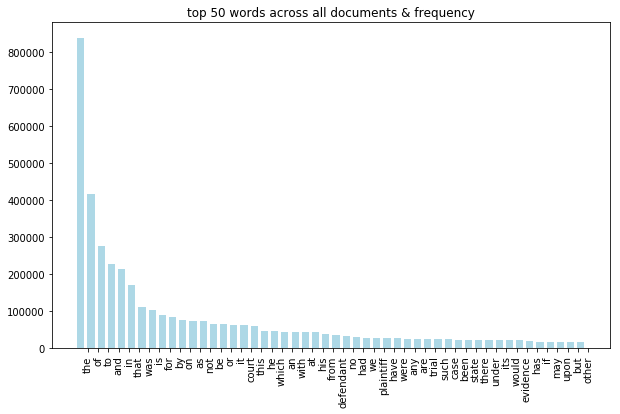

In [23]:
v_c.bar_plot(flat_list)